 Clustering comparison between K-Means and DBSCAN

First we perform K-Means clustering (use WCSS to find best K value)

In [29]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
ds = pd.read_csv("clustering.csv")
X = ds.iloc[:, [1, 2]].values
X_scaled = scaler.fit_transform(X)

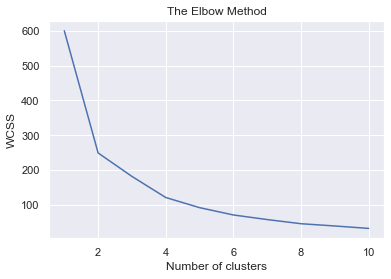

In [33]:
#use WCSS to help find best K value
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Text(0, 0.5, 'Feature 1')

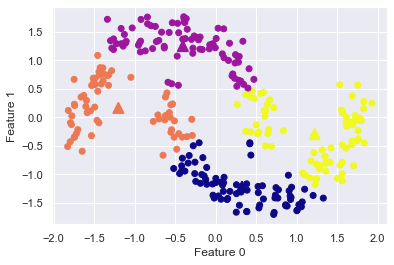

In [34]:
# cluster the data into four clusters (FOR KMeans ONLY)
kmeans = KMeans(n_clusters=4, init ="k-means++", random_state = 42)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
# plot the cluster assignments and cluster centers
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0], 
kmeans.cluster_centers_[:, 1],
marker='^', 
c=[0, 1, 2, 3],
s=100, 
linewidth=2,
cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Now we perform DBSCAN clustering (using knee locator to help find optimal parameter)

In [35]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

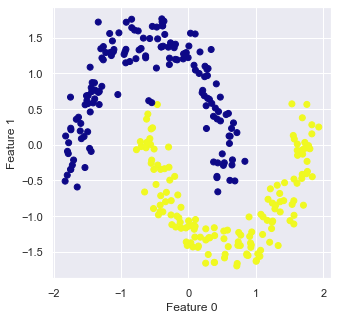

In [36]:
db = DBSCAN(eps=0.5, min_samples=10).fit(X_scaled)
labels = db.labels_
fig = plt.figure(figsize=(5, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

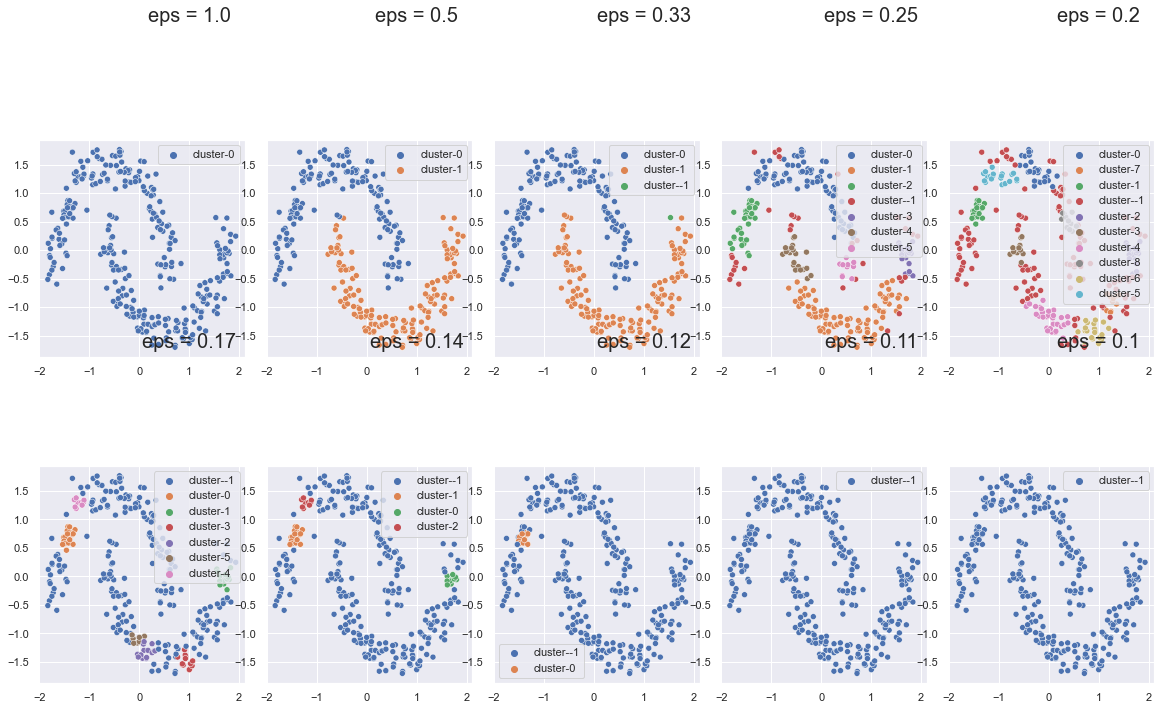

In [37]:
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.1)
i = 1

for x in range(10, 0, -1):
        eps = 1/(11-x)
        db = DBSCAN(eps=eps, min_samples=10).fit(X_scaled)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        clusters = db.labels_

        ax = fig.add_subplot(2, 5, i)
        ax.text(1, 4, "eps = {}".format(round(eps, 2)), fontsize=20, ha="center")
        sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue=["cluster-{}".format(x) for x in clusters])
        i += 1

In [38]:
#Fine Tuning with Knee Locator
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)

In [39]:
distances = np.sort(distances[:,10],axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

Text(0, 0.5, 'Distance')

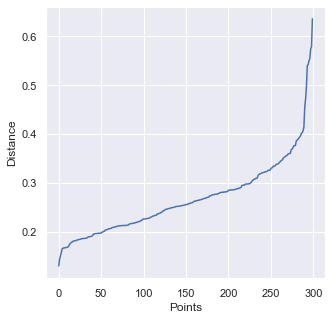

In [40]:
fig = plt.figure(figsize=(5,5))
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance')

0.34567786876134754


<Figure size 360x360 with 0 Axes>

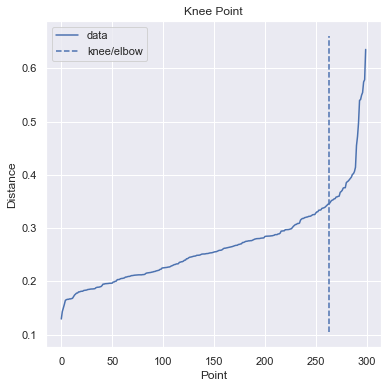

In [41]:
#Optimum Knee (High res)
fig = plt.figure(figsize=(5,5))
knee.plot_knee()
plt.xlabel("Point")
plt.ylabel("Distance")
plt.savefig("knee.png", dpi=300)
print(distances[knee.knee])

In [42]:
#DBSCAN Clustering: with optimum eps
db = DBSCAN(eps=distances[knee.knee], min_samples=10).fit(X_scaled)
labels = db.labels_

<AxesSubplot:>

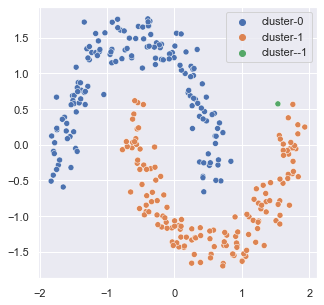

In [43]:
fig = plt.figure(figsize=(5,5))
sns.scatterplot(X_scaled[:,0], X_scaled [:,1], hue=["cluster-{}".format(x) for x in labels])

Comparing on the two techniques (K-Means and DBSCAN), with
graphical visualization comparisons and results and we decided that:

DBSCAN is the better clustering technique for this dataset
- Although K-Means is simple to implement and fast to execute, given this dataset contain complex clusters and a lot of outliers which K-Means does not do well with. 
- DBSCAN can identify clusters with arbitrary shapes, don't need cluster number as input as you can see the result above has less clusters than K-Means proving in this case it is more efficient. 